In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss





In [3]:
# Load dataset
df = pd.read_csv('/content/Employee_Salary_Dataset.csv')



In [4]:
df.head()

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000


In [5]:
df.tail()

,ID,Experience_Years,Age,Gender,Salary
30,31,10,34,Male,80000
31,32,15,54,Male,900000
32,33,20,55,Female,1540000
33,34,19,53,Female,9300000
34,35,16,49,Male,7600000


In [6]:
# Display basic statistics
print("Basic Statistics:")
df.describe()


Basic Statistics:


,ID,Experience_Years,Age,Salary
count,35.000000,35.00000,35.000000,3.500000e+01
mean,18.000000,9.20000,35.485714,2.059147e+06
std,10.246951,7.55295,14.643552,3.170124e+06
min,1.000000,1.00000,17.000000,3.000000e+03
25%,9.500000,2.50000,22.500000,2.250000e+04
50%,18.000000,6.00000,29.000000,2.500000e+05
75%,26.500000,15.00000,53.500000,3.270000e+06
max,35.000000,27.00000,62.000000,1.000000e+07


In [10]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

In [12]:
print("\nCorrelation Matrix:")
numeric_df.corr()



Correlation Matrix:


,ID,Experience_Years,Age,Salary
ID,1.000000,0.291098,0.282452,0.362092
Experience_Years,0.291098,1.000000,0.973708,0.685600
Age,0.282452,0.973708,1.000000,0.668444
Salary,0.362092,0.685600,0.668444,1.000000


In [15]:
def plot_histogram(column):
    plt.figure(dpi=120)
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

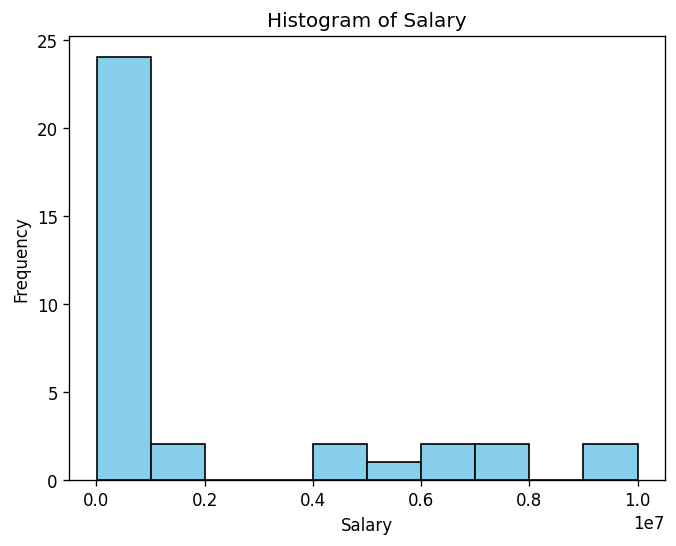

In [16]:
# Plot histogram for 'Salary'
plot_histogram('Salary')

In [17]:
#experienced vs salaray
def plot_scatter(x_column, y_column):
    plt.figure(dpi=120)
    plt.scatter(df[x_column], df[y_column], color='purple', alpha=0.6)
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

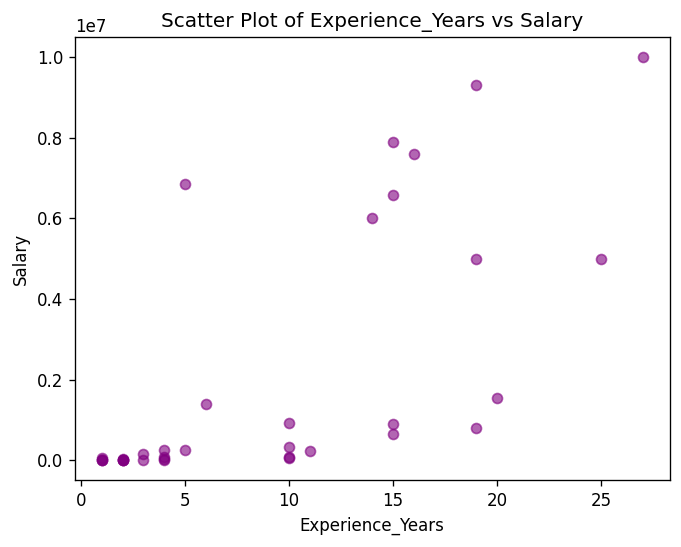

In [18]:
# Plot scatter plot for 'Experience_Years' vs 'Salary'
plot_scatter('Experience_Years', 'Salary')

In [19]:
def plot_heatmap(data):
    plt.figure(dpi=120)
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()




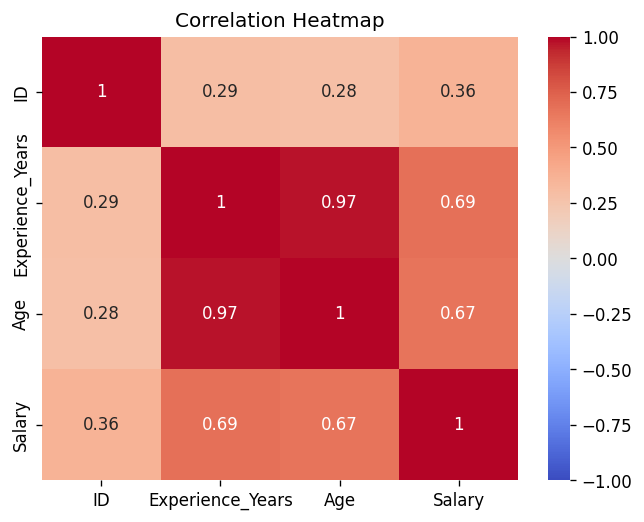

In [20]:
# Plot heatmap for the numeric columns
plot_heatmap(numeric_df)

In [21]:
from scipy.stats import skew, kurtosis

# Calculate and print skewness and kurtosis for each numeric column
for column in numeric_df.columns:
    col_skewness = skew(numeric_df[column])
    col_kurtosis = kurtosis(numeric_df[column])
    print(f"\nColumn: {column}")
    print(f"Skewness: {col_skewness}, Kurtosis: {col_kurtosis}")



Column: ID
Skewness: 0.0, Kurtosis: -1.2019607843137257

Column: Experience_Years
Skewness: 0.6641057890061244, Kurtosis: -0.680463101780175

Column: Age
Skewness: 0.47392534190404445, Kurtosis: -1.311732977649911

Column: Salary
Skewness: 1.3106022960185741, Kurtosis: 0.14217629828700273


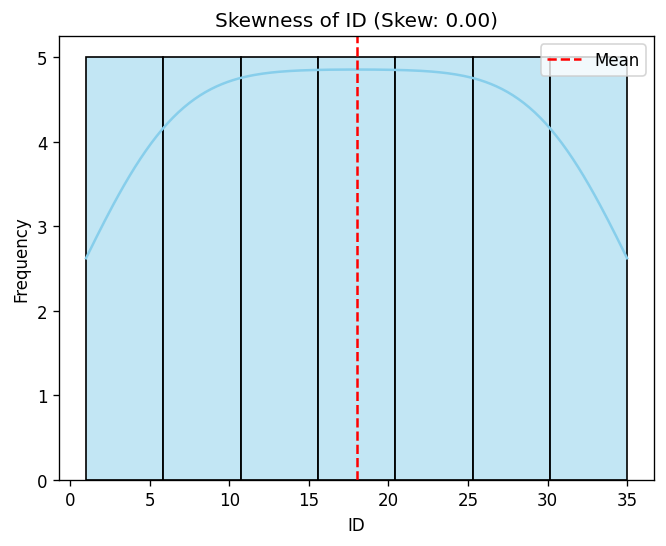

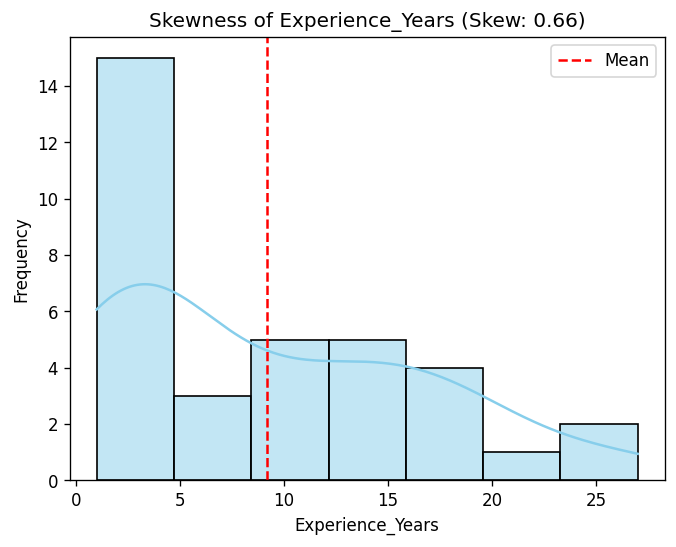

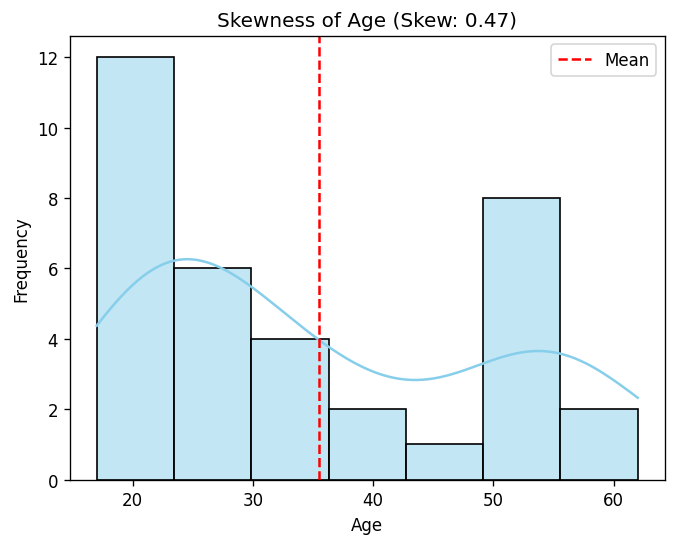

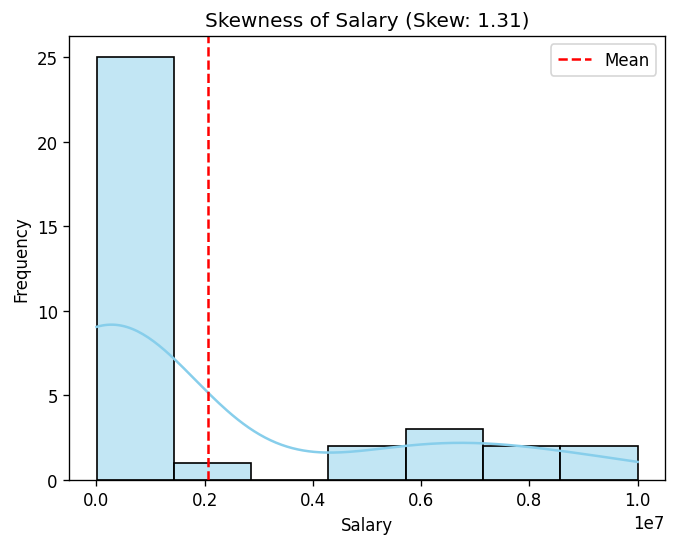

In [22]:
# Plot skewness for each numeric column
for column in numeric_df.columns:
    plt.figure(dpi=120)
    sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black')

    # Calculate skewness and display it on the plot
    col_skewness = skew(df[column])
    plt.axvline(df[column].mean(), color='red', linestyle='--', label=f'Mean')

    plt.title(f'Skewness of {column} (Skew: {col_skewness:.2f})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()